In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import itertools
import pandas as pd
import math
from matplotlib import animation
import random
import scipy.special
from os import listdir
from os.path import isfile, join
import os

#Read data

dir_path = '/home/samuel/Documents/PhD/Quasispecies/Data/'
index_name =  dir_path + 'seqs_index.dict'

index_dict = {}

with open(index_name, 'r') as f:
    for line in f:
        L = line.split('\t')
        index_dict[L[1][:-1]] = int(L[0])
        


WD = os.getcwd()
mypath = dir_path + 'Sequences_filtered/N_rem_rem/'

#Obtain the file names
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles = [a for a in onlyfiles if '_Nrem' in a]
data_dict = {}
data_dict[43] = {}
data_dict[30] = {}


#a = onlyfiles[0]
#Interpret file name, and extract step number from it

for a in onlyfiles:    
    if a[0] == 'c':
        step = int(a.split('-')[1][1:])
        t=43
        print(f'step={step} for t={t}')
    elif a[0] == '3':
        step = int(a.split('-')[2])
        t=30
        print(f'step={step} for t={t}')
    
    file_name = dir_path + 'Sequences_filtered/N_rem_rem/' + a
    seq_2_ab = {}
    with open(file_name, 'r') as r:
        for line in r:
            if line[0] == '>':
                abundance = int(line.split('-')[1][:-1])
                #print(abundance)
            else:
                sequence = line[:-1]
                hapl = index_dict[sequence]
                seq_2_ab[hapl]= abundance
    data_dict[t][step] = seq_2_ab
    
df = {}
#Upload data to DataFrame
df[43] = pd.DataFrame([])
df[30] = pd.DataFrame([])
df[43] = pd.DataFrame.from_dict(data_dict[43])
df[30] = pd.DataFrame.from_dict(data_dict[30])
df[43] = df[43].fillna(0)
df[30] = df[30].fillna(0)

step=25 for t=30
step=23 for t=43
step=58 for t=43
step=16 for t=30
step=44 for t=43
step=44 for t=30
step=22 for t=30
step=56 for t=43
step=42 for t=43
step=42 for t=30
step=32 for t=43
step=4 for t=43
step=50 for t=43
step=14 for t=30
step=50 for t=30
step=48 for t=30
step=36 for t=43
step=46 for t=43
step=10 for t=30
step=30 for t=30
step=40 for t=30
step=56 for t=30
step=2 for t=43
step=52 for t=30
step=60 for t=43
step=34 for t=30
step=28 for t=30
step=54 for t=30
step=58 for t=30
step=28 for t=43
step=16 for t=43
step=32 for t=30
step=26 for t=30
step=20 for t=30
step=12 for t=43
step=38 for t=43
step=26 for t=43
step=2 for t=30
step=48 for t=43
step=22 for t=43
step=18 for t=43
step=1 for t=43
step=54 for t=43
step=46 for t=30
step=20 for t=43
step=8 for t=43
step=52 for t=43
step=4 for t=30
step=36 for t=30
step=6 for t=43
step=14 for t=43
step=38 for t=30
step=18 for t=30
step=34 for t=43
step=12 for t=30
step=8 for t=30
step=30 for t=43
step=6 for t=30
step=23 for t=30
step=1

In [13]:


temps = [30,43]

cmap = {30:'b', 43:'r'}

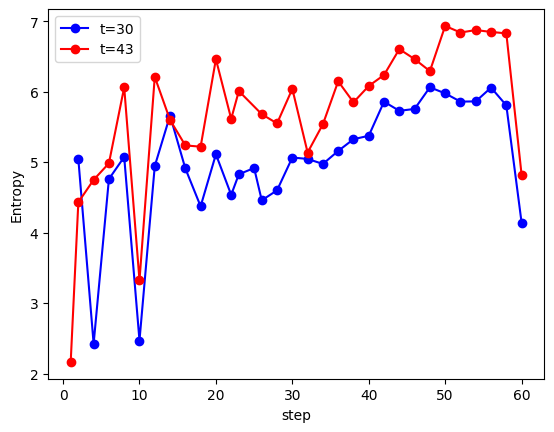

In [16]:
#Plot entropy

for t in temps:
    L = df[t].columns.tolist()
    L.sort()
    #try: L.remove(1)
    #except: pass
    #L.remove(2)
    #L.remove(4)
    #L.remove(10)
    #L.remove(60)
    y = np.zeros((1,len(L)))
    for n,step in enumerate(L):
        

        df_x = df[t][step]
        abundance = df_x.to_dict()

        
        p = np.array(df_x.tolist())
        p = p[p.nonzero()]
        p = p/np.sum(p)
        p_log = np.log2(p)
        p_h = -1.0*p*p_log
        y[0][n]= p_h.sum()
    
    #Export steps, entropy for each t
    
    plt.plot(L, y[0], 'o-', label=f't={t}', c=cmap[t])
    plt.ylabel(f'Entropy')
    plt.xlabel(f'step')
    #plt.title(f'Dependence of entropy for t={t}')
    #plt.savefig(f'Entropy_{t}')
plt.legend(loc='best') 
#plt.title(f'sample size = {n_min}')
#plt.savefig('./entropy_Nremrem_withoutbad.svg', dpi=300, format='svg')
plt.savefig('./entropy_Nremrem.svg', dpi=300, format='svg')
plt.show()

In [3]:
# Get the minimum number of sequences in all experiments
n_min = int(df[temps[0]][df[temps[0]].columns[0]].sum())
for t in temps:
    L = df[t].columns.tolist()
    L.sort()
    for element in L:
        x = int(df[t][element].sum())
        if x<n_min:
            n_min = x
            #print(t,element)
    
# Get the minimum number of haplotypes in all experiments


h_min = int(len(df[temps[0]][df[temps[0]].columns.tolist()[0]].to_numpy().nonzero()[0]))
for t in temps:
    L = df[t].columns.tolist()
    L.sort()
    for element in L:
        df_x = df[t][element]
        x = int(len(df[t][element].to_numpy().nonzero()[0]))
        if x<h_min:
            h_min = x
            #print(t,element)

In [4]:
# Get the maximum number of sequences in all experiments
n_max = int(df[temps[0]][df[temps[0]].columns[0]].sum())
for t in temps:
    L = df[t].columns.tolist()
    L.sort()
    for element in L:
        x = int(df[t][element].sum())
        if x>n_max:
            n_max = x
            #print(t,element)
    
# Get the minimum number of haplotypes in all experiments


h_max = int(len(df[temps[0]][df[temps[0]].columns.tolist()[0]].to_numpy().nonzero()[0]))
for t in temps:
    L = df[t].columns.tolist()
    L.sort()
    for element in L:
        df_x = df[t][element]
        x = int(len(df[t][element].to_numpy().nonzero()[0]))
        if x>h_max:
            h_max = x
            #print(t,element)

In [6]:
#Select the min number of sequences and resample each t,step just to have the same number, 
#build a df_truncated and 
#compute entropy
for t in temps:
    L = df[t].columns.tolist()
    L.sort()
    y = np.zeros((1,len(L)))
    for n,step in enumerate(L):
        

        df_x = df[t][step]
        abundance = df_x.to_dict()

        desampled = []
        for element in abundance.keys():
            desampled.append([element for i in range(int(abundance[element]))])
        desampled = list(itertools.chain(*desampled))

        #Randomly shuffle the desampled list
        desampled_random = []
        random.seed(datetime.now().timestamp())
        for i in range(len(desampled)):
            j = random.randint(0, len(desampled)-1)
            desampled_random.append(desampled[j])
            desampled.pop(j)   
        desampled = desampled_random
        

        new_l = random.sample(desampled, n_min)
        print(f'step={step}, temp={t}, len={len(new_l)}')
        df_x = pd.DataFrame(new_l, columns=['seq'])

        df_x = df_x.pivot_table(columns=['seq'], aggfunc='size')
        
        p = np.array(df_x.tolist())
        p = p[p.nonzero()]
        p = p/np.sum(p)
        p_log = np.log2(p)
        p_h = -1.0*p*p_log
        y[0][n]= p_h.sum()
    
    #Export steps, entropy for each t
    
    plt.plot(L, y[0], 'o-', label=f't={t}', c=cmap[t])
    plt.ylabel(f'Entropy')
    plt.xlabel(f'step')
    #plt.title(f'Dependence of entropy for t={t}')
    #plt.savefig(f'Entropy_{t}')
plt.legend(loc='best') 
plt.title(f'sample size = {n_min}')
plt.savefig('./pics_results/entropy_minsequences.png')
plt.show()

step=2, temp=30, len=218682
step=4, temp=30, len=218682
step=6, temp=30, len=218682
step=8, temp=30, len=218682
step=10, temp=30, len=218682
step=12, temp=30, len=218682
step=14, temp=30, len=218682
step=16, temp=30, len=218682
step=18, temp=30, len=218682
step=20, temp=30, len=218682
step=22, temp=30, len=218682
step=23, temp=30, len=218682
step=25, temp=30, len=218682
step=26, temp=30, len=218682
step=28, temp=30, len=218682
step=30, temp=30, len=218682
step=32, temp=30, len=218682
step=34, temp=30, len=218682
step=36, temp=30, len=218682
step=38, temp=30, len=218682
step=40, temp=30, len=218682
step=42, temp=30, len=218682
step=44, temp=30, len=218682
step=46, temp=30, len=218682
step=48, temp=30, len=218682
step=50, temp=30, len=218682
step=52, temp=30, len=218682
step=54, temp=30, len=218682
step=56, temp=30, len=218682


KeyboardInterrupt: 

In [ ]:

#Select the number of haploroups and resample each t,step just to have the same number, 
#build a df_truncated and 
#compute entropy

n_haplos_list = [100, 200, 300,400, 500, 600,700,800,
                 900,1000, 1500, 2000, 2500, 3000, 
                 3500,4000,4500,5000, 5500,6000,6500,
                 7000,7500, 7600,7700,7800,7900,8000, 8100, 8200, 8300]
for n_haplos in n_haplos_list:
    plt.figure()
    for t in temps:
        L = df[t].columns.tolist()
        L.sort()
        y = np.zeros((1,len(L)))
        for n,step in enumerate(L):

            df_x = df[t][step].sort_values(ascending=False)
            df_x = df_x.iloc[:n_haplos]
            p = np.array(df_x.tolist())
            p = p[p.nonzero()]
            p = p/np.sum(p)
            p_log = np.log2(p)
            p_h = -1.0*p*p_log
            y[0][n]= p_h.sum()/math.log2(len(p))
        plt.plot(L, y[0], 'o-', label=f't={t}', c=cmap[t])
        plt.ylabel(f'Entropy/log2(No. haplogroups)')
        plt.xlabel(f'step')
        #plt.title(f'Dependence of entropy for t={t}')
        #plt.savefig(f'Entropy_{t}')
    plt.ylim(0.1,0.5)
    plt.legend(loc='best') 
    plt.title(f'No. haplogroups = {n_haplos}')
    plt.savefig(f'./pics_results/entropy_haplo_imgs/entropy_{n_haplos}.png')
#plt.show()

In [ ]:
# Create new figure for GIF
fig, ax = plt.subplots()

# Adjust figure so GIF does not have extra whitespace
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
ax.axis('off')
ims = []

for n_haplos in n_haplos_list:
    im = ax.imshow(plt.imread(f'./pics_results/entropy_haplo_imgs/entropy_{n_haplos}.png'), animated = True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=600)
ani.save(f'./pics_results/entropy_nhaplos.gif')

In [ ]:
n_haplos = h_min

for t in temps:
    L = df[t].columns.tolist()
    L.sort()
    y = np.zeros((1,len(L)))
    for n,step in enumerate(L):
        
        df_x = df[t][step].sort_values(ascending=False)
        df_x = df_x.iloc[:n_haplos]
        p = np.array(df_x.tolist())
        p = p[p.nonzero()]
        p = p/np.sum(p)
        p_log = np.log2(p)
        p_h = -1.0*p*p_log
        y[0][n]= p_h.sum()/math.log2(n_haplos)
    plt.plot(L, y[0], 'o-', label=f't={t}', c=cmap[t])
    plt.ylabel(f'Entropy')
    plt.xlabel(f'step')
    #plt.title(f'Dependence of entropy for t={t}')
    #plt.savefig(f'Entropy_{t}')
plt.legend(loc='best') 
plt.title(f'No. haplogroups = {n_haplos}')
plt.savefig(f'./pics_results/entropy_{n_haplos}.png')
plt.show()

In [ ]:
sqs = len(list(index_dict.keys()))
print(f'Total number of sequences: {sqs}.')
print(f'Min haplogrs in step: {h_min}.')
print(f'Max haplogrs in step: {h_max}.')

In [ ]:
#Entropy for all steps
for t in temps:
    L = df[t].columns.tolist()
    
    try:
        L.remove(1)
    except:
        pass

    L.remove(4)
    L.remove(10)
    L.remove(60)
    
    L.sort()
    y = np.zeros((1,len(L)))
    for n,step in enumerate(L):
        
        df_x = df[t][step].sort_values(ascending=False)
        p = np.array(df_x.tolist())
        p = p[p.nonzero()]
        p = p/np.sum(p)
        p_log = np.log2(p)
        p_h = -1.0*p*p_log
        #y[0][n]= p_h.sum()/math.log2(len(p))
        y[0][n]= p_h.sum()
    plt.plot(L, y[0], 'o-', label=f't={t}', c=cmap[t])
    plt.ylabel(f'Entropy')
    plt.xlabel(f'step')
    plt.xlim(0,60)
    
    #plt.title(f'Dependence of entropy for t={t}')
    #plt.savefig(f'Entropy_{t}')
plt.legend(loc='best') 
#plt.title(f'No')
plt.savefig('./pics_results/entropy_all_remove.png')
plt.show()

In [ ]:
#We want to see how the entropy behaves with a function that combines exponential and power law. 
#The resulting distribution is a linear mixture   mu*power-law + (1-mu)*exponential 
#First we want to see if a function like that can fit the abundance_vs_r data we have. 
#Then, see how the entropy behaves with mu for different x_max sizes 

In [6]:
#Entropy of power-law


def distr_plaw(x, alpha):
    '''
    Function that returns the probability fo getting x in
    a power-law distribution
    
    Input:
    -x -> float
    -alpha -> float (parameter of the distribution)
    '''
    return 1/scipy.special.zeta(alpha)*x**(-alpha)

def distr_exp(x,beta):
    '''
    Function that returns the probability fo getting x in
    a power-law distribution
    
    Input:
    -x -> float
    -alpha -> float (parameter of the distribution)
    '''
    return (math.exp(beta)-1)*math.exp(-beta*x)
    
def entropy(z):
    '''
    Function that returns the entropy of a distribution
    
    Input:
    Array z
    '''
    
    z_log = np.log2(z, , where=0<z, out=np.nan*z)
    z_log = np.where(np.isnan(z_log), 0, z_log)
    return -1.0*z.dot(z_log)

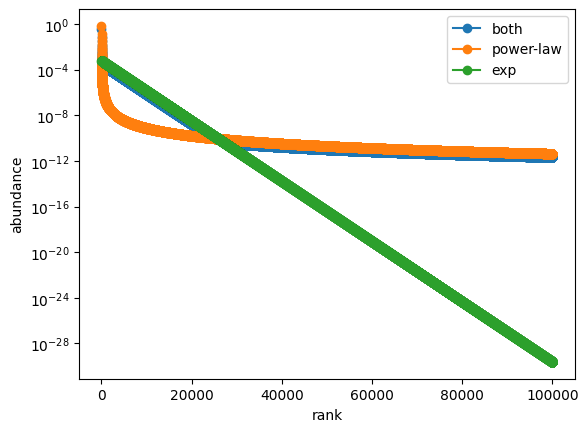

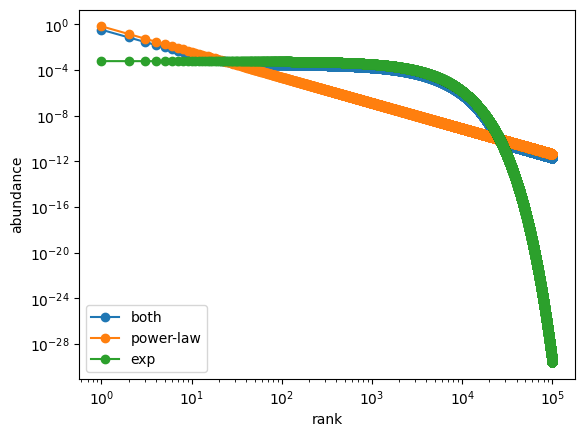

In [7]:
# Visualization of the theoretical linear curves

x_max = 10**5
alpha = 2.24
beta = 1/1645

mu = 0.5
x = np.arange(1,x_max+1)

y = np.array([mu*distr_plaw(i, alpha) + (1-mu)*distr_exp(i, beta)for i in x])
#y_mult = np.array([distr_plaw(i, alpha)*distr_exp(i, alpha)for i in x])

plt.plot(x,y,'o-', label='both')
plt.plot(x,[distr_plaw(i, alpha) for i in x], 'o-', label='power-law')
plt.plot(x,[distr_exp(i, beta) for i in x], 'o-', label='exp')
#plt.plot(x,y_mult,'o-')
plt.yscale('log')

plt.ylabel('abundance')
plt.xlabel('rank')

plt.legend(loc='best')
plt.show()

plt.figure()
plt.plot(x,y,'o-', label='both')
plt.plot(x,[distr_plaw(i, alpha) for i in x], 'o-', label='power-law')
plt.plot(x,[distr_exp(i, beta) for i in x], 'o-', label='exp')
#plt.plot(x,y_mult,'o-')
plt.yscale('log')
plt.xscale('log')

plt.ylabel('abundance')
plt.xlabel('rank')

plt.legend(loc='best')
#plt.xscale('log')

mu=0.0
mu=0.05263157894736842
mu=0.10526315789473684
mu=0.15789473684210525
mu=0.21052631578947367
mu=0.2631578947368421
mu=0.3157894736842105
mu=0.3684210526315789
mu=0.42105263157894735
mu=0.47368421052631576
mu=0.5263157894736842
mu=0.5789473684210527
mu=0.631578947368421
mu=0.6842105263157894
mu=0.7368421052631579
mu=0.7894736842105263
mu=0.8421052631578947
mu=0.894736842105263
mu=0.9473684210526315
mu=1.0


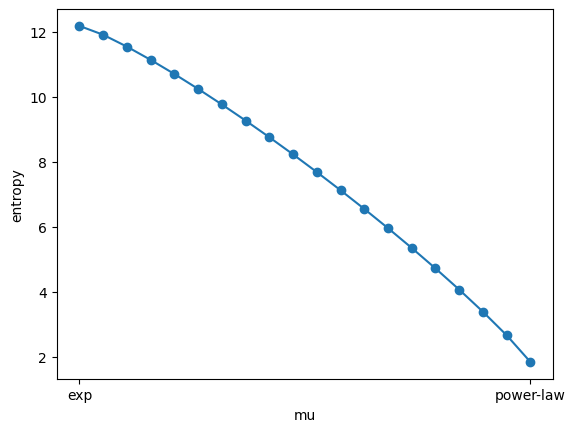

In [44]:
#Dependence of entopy with mu (linear)

mu_list = np.linspace(0, 1, 20)

x_max = 10**6
params = [2.25, 1/1700, 0.5]
alpha = params[0]
beta = params[1]

x = np.arange(1,x_max+1)
s_results = []
for mu in mu_list:
    print(f'mu={mu}')
    y = np.array([mu*distr_plaw(i, alpha) + (1-mu)*distr_exp(i, beta)for i in x])
    #print(y)
    #s = np.array([entropy(i) for i in y])
    
    s_results.append(entropy(y))

plt.plot(mu_list, s_results, 'o-')
plt.ylabel('entropy')
plt.xlabel('mu')
my_xticks = ['exp', 'power-law']
plt.xticks([mu_list[0],mu_list[-1]], my_xticks)
plt.savefig('./pics_results/entropy_estimation_mu')

N=109341.0
N=208524.5
N=307708.0
N=406891.5
N=506075.0
N=605258.5
N=704442.0


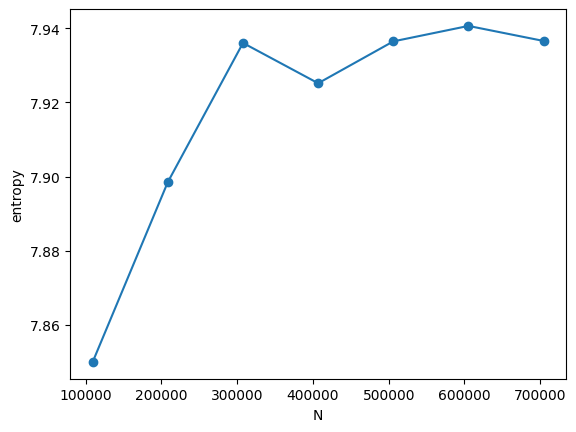

In [51]:
#Dependence of entropy with sampling size (linear)

params = [2.25, 1/1700, 0.5]
alpha = params[0]
beta = params[1]
mu = params[2]
s_results = []
N_list = np.linspace(n_min//2,n_max, 7)
for N in N_list:
    print(f'N={N}')
    y = create_sample(int(N), params[0], params[1], params[2])
    #print(entropy(y))
    s_results.append(entropy(y))
plt.plot(N_list, s_results, 'o-')
plt.ylabel('entropy')
plt.xlabel('N')
#my_xticks = ['exp', 'power-law']
#plt.xticks([mu_list[0],mu_list[-1]], my_xticks)
plt.savefig('./pics_results/entropy_estimation_N')

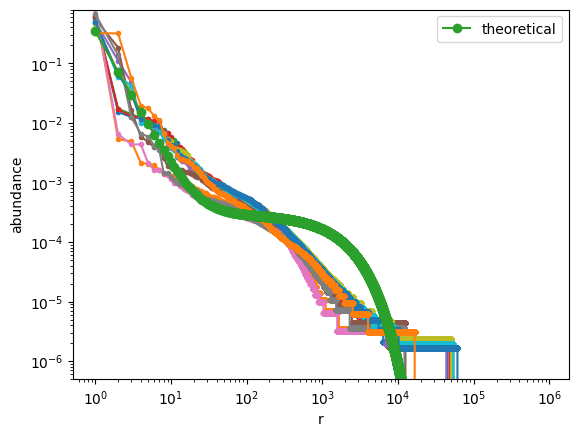

In [12]:
#Plot showing theoretical curve and some samplings

plt.figure()
for t in temps:

    df_t = df[t]
    #df_t = df_t.sort_index()

    L = list(df_t.columns)
    L.sort()
    n = len(L)
    

    abundances = {i: [] for i in L}
    #abundances_fixrank = np.zeros((n, r_max))

    for i,step in enumerate(L):        

        vlist = df_t[step].to_list()
        #print(vlist)
        vlist.sort(reverse=True)
        vector = np.array(vlist)
        # Normalize by 1
        vector = vector / vector.sum()
        #print(vector.sum())

        abundances[step]= vector
    
    x = [1+i for i in range(len(vlist))]
    
    for i,step in enumerate(L):
        if step in [L[0], 10, 30,40,43,20,60]:
            plt.plot(x, abundances[step], 'o-',markersize=3)
            #plt.scatter(x, abundances[i] , s=10)

params = [2.25, 1/1700, 0.5]
alpha = params[0]
beta = params[1]
mu = params[2]

#y = create_sample(100000, params[0], params[1], params[2])
#plt.plot(np.arange(1,len(y)+1),y, 'o', markersize=5, label='sampled 10^5 sequences')

x = np.arange(1,1000000+1)

y = np.array([mu*distr_plaw(i, alpha) + (1-mu)*distr_exp(i, beta)for i in x])
plt.plot(x[:10**5],y[:10**5],'o-', label='theoretical')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('abundance')
plt.xlabel('r')
plt.ylim(ymax=0.8, ymin=5*10**-7)
#plt.xlim(xmax=7*10**4, xmin=0.5)


plt.legend()
#plt.savefig('./pics_results/abundances_predict_linlog.png')
plt.savefig('./pics_results/abundances_predict_loglog.png')

In [8]:
print(f'Our data contains between {h_min} and {h_max} haplotypes in steps')

Our data contains between 8344 and 64826 haplotypes in steps


In [12]:
#Having certain f(x) i want to sample sequences (x)
#I can only sample N sequences

#Then I should construct a abundance_vs_rank distribution

In [9]:
#Next step is automatize for each real data step and temperature, fit the values of alpha and beta.

#Then we can simulate those values and compare.

In [10]:
#Pseudo-code

#For a abundance-rank list, we can do the next

# Let x be the rank vector [1,2,3,4 ..... max_rank]

# Initialize the vector params=(alpha, beta, mu)
# d_y0 = distance(f(x, params) - y_real)     using an euclidean norm-2
# Define a number of iterations n_iters
# for i in range(n_iters):
# Then we compute the vector pseudo_params = params + stochastic_fluctuation(zero,sigma)   then sigma is like our learning factor 10**-2 approx
# d_y = distance(f(x, pseudo_params) - y_real)     using an euclidean norm-2
# if d_y <d_y0 then we update params = pseudo_params.
# The result is the bst fit for params


#We need to see how many iterations do we need, and how good our fit is going to be, as well as the impat of the sigma in stochasticity

In [50]:
#Entropy of power-law


def distr_plaw(x, alpha):
    '''
    Function that returns the probability fo getting x in
    a power-law distribution
    
    Input:
    -x -> float
    -alpha -> float (parameter of the distribution)
    '''
    return 1/scipy.special.zeta(alpha)*x**(-alpha)

def distr_exp(x,beta):
    '''
    Function that returns the probability fo getting x in
    a power-law distribution
    
    Input:
    -x -> float
    -alpha -> float (parameter of the distribution)
    '''
    return (math.exp(beta)-1)*math.exp(-beta*x)
    
#Compute entropy as funcio
def entropy(z):
    '''
    Function that returns the entropy of a distribution
    
    Input:
    Array z
    '''
    
    z_log = np.log2(z,where=0<z, out=np.nan*z)
    z_log = np.where(np.isnan(z_log), 0, z_log)
    return -1.0*z.dot(z_log)


def create_sample(N_samples, alpha, beta, mu, len_out=None):
    '''
    Function that returns an array of abundances. 
    It samples N_samples sequences from a f(x) of
    mixed power-law(alpha) and exponential(beta) using
    a tunning parameter mu.
    
    Input:
    -N_samples -> int
    -alpha -> float -> parameter for power-law
    -beta -> float -> parameter for exponential
    '''
    
    max_distribs = 10**6    #This is for the theoretical distributions, ideally it is infinity, and is like a maximum number of haplotypes
    #define f
    #y = np.array([(distr_plaw(i, alpha))**mu * (distr_exp(i, beta))**(1-mu) for i in x])
    #f = {i: distr_plaw(i, alpha)**mu * (distr_exp(i, beta))**(1-mu) for i in range(1,max_distribs+1)}
    f = {i: mu*distr_plaw(i, alpha) + (1-mu)*distr_exp(i, beta) for i in range(1,max_distribs+1)}

    #compute cummulative of f:
    f_cum={1:f[1]}
    for i in range(2,max_distribs):
        f_cum[i] = f_cum[i-1]+f[i]
    #f_cum = {i: f[i]+f[i+1] for i in range(2,)}


    def random_sample(r):
        '''
        Given a random r from 0 to 1, returns a random
        variable with the function f
        '''
        for i in range(1,max_distribs-1):
            if f_cum[i] > r:
                return i
            else:
                pass
        return random.randint(1,max_distribs)
    
    sequences = []
    
    for i in range(N_samples):
        sequences.append(random_sample(random.random()))

    #Compute abundances for sequences
    abundance = {i:0 for i in range(1,max(sequences)+1)}

    for i in range(N_samples):
        abundance[sequences[i]] +=1
        
    y = np.array(list(abundance.values()))
    y = y/y.sum()
    
    if len_out:
        if len(y)>len_out:
            y = y[:len_out]
        elif len(y)<len_out:
            y = list(y)
            for i in range(len_out-len(y)):
                y.append(0)
            y = np.array(y)
    return y

In [164]:
alpha = 1.2545140893960918
beta = 0.0005950295701929936    #1/1643.11
mu=0.4937315487971518
params = [alpha, beta, mu]

sigma = 10**(-2)

y_real = df[30][58].to_numpy()
N_samples = int(y_real.sum())
print(f'Nsamples = {N_samples}')
#N_samples = 10000
y_real = y_real/y_real.sum()

#track_params_list = []
#track_dist_list = []
min_d = 0

n_iters = 5
for i in range(n_iters):
    print(f'iteration {i+1}')
    y = create_sample(N_samples , params[0], params[1], params[2], len_out=len(y_real))
    print('Sample created!')
    x = np.arange(1,len(y)+1)

    #d_0 = np.sum(np.abs(y-y_real))
    
    b = np.log2(y, where=0<y, out=np.nan*y)
    b = np.where(np.isnan(b), 0, b)
    a = np.log2(y_real, where=0<y_real, out=np.nan*y_real)
    a = np.where(np.isnan(a), 0, a)
    d_0 = np.abs(b-a).sum()
    
    params_eps = [
        alpha*(1+ np.random.normal(0,sigma)) , 
        beta*(1+ np.random.normal(0,sigma)), 
        mu*(1+ np.random.normal(0,sigma)),
    ]
    y = create_sample(N_samples , params_eps[0], params_eps[1], params_eps[2], len_out=len(y_real))
    print('Sample created!')
    b = np.log2(y, where=0<y, out=np.nan*y)
    b = np.where(np.isnan(b), 0, b)
    d_1 = np.abs(b).sum()
    #print(d_0,d_1)
        
        
    #print(params[1])
    if i ==0:
        min_d = track_dist_list[-1]
        #track_dist_list.append(min_d)
    if d_1 < min_d:
        params = params_eps
        min_d = d_1
        print(d_1, f'alpha={params[0]}, beta={params[1]}, mu={params[2]}')
    track_params_list.append(params)
    track_dist_list.append(min_d)

Nsamples = 460339
iteration 1
Sample created!
Sample created!
iteration 2
Sample created!
Sample created!
iteration 3
Sample created!
Sample created!
iteration 4
Sample created!
Sample created!
iteration 5
Sample created!
Sample created!


In [ ]:
alpha = 1.2545140893960918
beta = 0.0005950295701929936    #1/1643.11
mu=0.4937315487971518

Text(0.5, 0, 'rank')

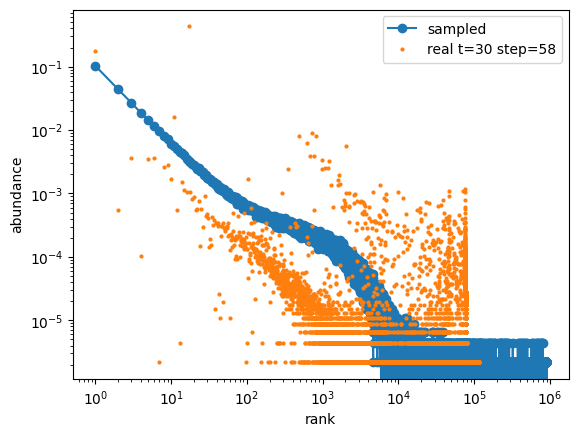

In [166]:
plt.plot(x,y, 'o-', label='sampled')
plt.plot(x,y_real, 'o', markersize=2, label='real t=30 step=58')
plt.yscale('log')
plt.legend(loc='best')
plt.xscale('log')
plt.ylabel('abundance')
plt.xlabel('rank')

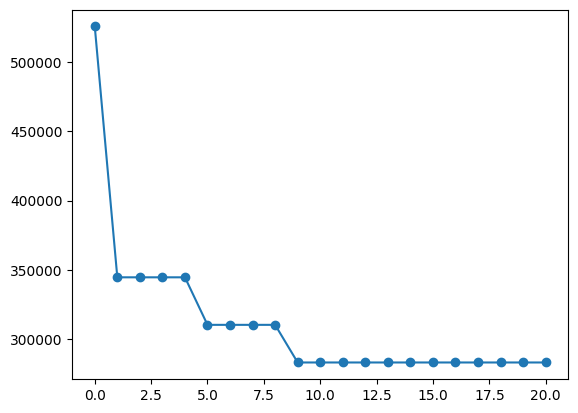

In [167]:
plt.plot([i for i in range(len(track_dist_list))], track_dist_list, 'o-')

In [168]:
track_params_list

[[1.220722383676527, 0.0006086249671148246, 0.49842846842941],
 [1.220722383676527, 0.0006086249671148246, 0.49842846842941],
 [1.220722383676527, 0.0006086249671148246, 0.49842846842941],
 [1.220722383676527, 0.0006086249671148246, 0.49842846842941],
 [1.2379618111090578, 0.0006022811562208522, 0.49861823261887855],
 [1.2379618111090578, 0.0006022811562208522, 0.49861823261887855],
 [1.2379618111090578, 0.0006022811562208522, 0.49861823261887855],
 [1.2379618111090578, 0.0006022811562208522, 0.49861823261887855],
 [1.2545140893960918, 0.0005950295701929936, 0.4937315487971518],
 [1.2545140893960918, 0.0005950295701929936, 0.4937315487971518],
 [1.2545140893960918, 0.0005950295701929936, 0.4937315487971518],
 [1.2545140893960918, 0.0005950295701929936, 0.4937315487971518],
 [1.2545140893960918, 0.0005950295701929936, 0.4937315487971518],
 [1.2545140893960918, 0.0005950295701929936, 0.4937315487971518],
 [1.2545140893960918, 0.0005950295701929936, 0.4937315487971518],
 [1.25451408939609

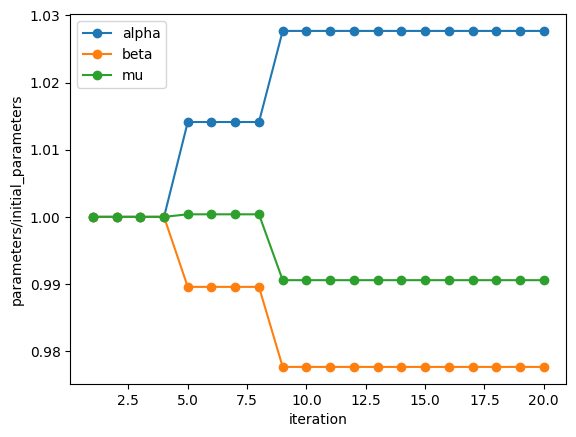

In [169]:
plt.plot([i+1 for i in range(len(track_params_list))], [elem[0]/track_params_list[0][0] for elem in track_params_list], 'o-', label='alpha')
plt.plot([i+1 for i in range(len(track_params_list))], [elem[1]/track_params_list[0][1] for elem in track_params_list], 'o-', label='beta')
plt.plot([i+1 for i in range(len(track_params_list))], [elem[2]/track_params_list[0][2] for elem in track_params_list], 'o-', label='mu')
plt.ylabel('parameters/initial_parameters')
plt.xlabel('iteration')
plt.legend(loc='best')

In [15]:
import pickle

In [173]:
with open('./computes_results/track_params_list', 'wb') as file:
    pickle.dump(track_params_list, file)

In [174]:
with open('./computes_results/track_dist_list', 'wb') as file:
    pickle.dump(track_dist_list, file)

In [17]:
with open('./computes_results/track_params_list', 'rb') as file:
    track_params_list = pickle.load(file)
    #pickle.dump(track_params_list, file)
with open('./computes_results/track_dist_list', 'rb') as file:
    track_dist_list = pickle.load(file)

In [20]:
params = track_params_list[-1]


In [31]:
def create_sample(N_samples, alpha, beta, mu, len_out=None):
    '''
    Function that returns an array of abundances. 
    It samples N_samples sequences from a f(x) of
    mixed power-law(alpha) and exponential(beta) using
    a tunning parameter mu.
    
    Input:
    -N_samples -> int
    -alpha -> float -> parameter for power-law
    -beta -> float -> parameter for exponential
    '''
    
    max_distribs = 10**5    #This is for the theoretical distributions, ideally it is infinity, and is like a maximum number of haplotypes
    #define f
    #y = np.array([(distr_plaw(i, alpha))**mu * (distr_exp(i, beta))**(1-mu) for i in x])
    f = {i: distr_plaw(i, alpha)**mu * (distr_exp(i, beta))**(1-mu) for i in range(1,max_distribs+1)}
    #f = {i: mu*distr_plaw(i, alpha) + (1-mu)*distr_exp(i, beta) for i in range(1,max_distribs+1)}

    #compute cummulative of f:
    f_cum={1:f[1]}
    for i in range(2,max_distribs):
        f_cum[i] = f_cum[i-1]+f[i]
    #f_cum = {i: f[i]+f[i+1] for i in range(2,)}


    def random_sample(r):
        '''
        Given a random r from 0 to 1, returns a random
        variable with the function f
        '''
        for i in range(1,max_distribs-1):
            if f_cum[i] > r:
                return i
            else:
                pass
        return random.randint(1,max_distribs)
    
    sequences = []
    
    for i in range(N_samples):
        sequences.append(random_sample(random.random()))

    #Compute abundances for sequences
    abundance = {i:0 for i in range(1,max(sequences)+1)}

    for i in range(N_samples):
        #print(i)
        abundance[sequences[i]] +=1
        
    y = np.array(list(abundance.values()))
    y = y/y.sum()
    
    if len_out:
        if len(y)>len_out:
            y = y[:len_out]
        elif len(y)<len_out:
            y = list(y)
            for i in range(len_out-len(y)):
                y.append(0)
            y = np.array(y)
    return y

def entropy(z):
    '''
    Function that returns the entropy of a distribution
    
    Input:
    Array z
    '''
    
    z_log = np.log2(z, where=0<z, out=np.nan*z)
    z_log = np.where(np.isnan(z_log), 0, z_log)
    return -1.0*z.dot(z_log)

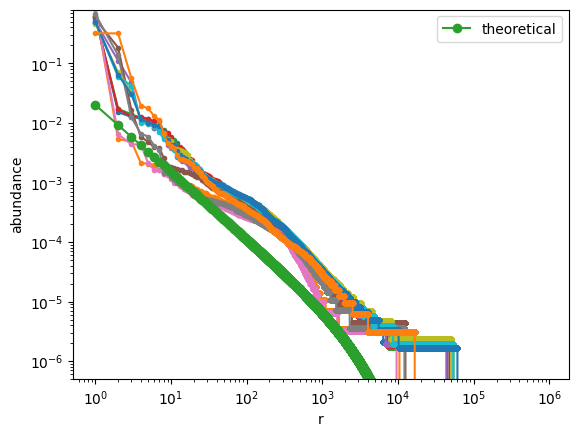

In [14]:
#Plot showing theoretical curve and some samplings

plt.figure()
for t in temps:

    df_t = df[t]
    #df_t = df_t.sort_index()

    L = list(df_t.columns)
    L.sort()
    n = len(L)
    

    abundances = {i: [] for i in L}
    #abundances_fixrank = np.zeros((n, r_max))

    for i,step in enumerate(L):        

        vlist = df_t[step].to_list()
        #print(vlist)
        vlist.sort(reverse=True)
        vector = np.array(vlist)
        # Normalize by 1
        vector = vector / vector.sum()
        #print(vector.sum())

        abundances[step]= vector
    
    x = [1+i for i in range(len(vlist))]
    
    for i,step in enumerate(L):
        if step in [L[0], 10, 30,40,43,20,60]:
            plt.plot(x, abundances[step], 'o-',markersize=3)
            #plt.scatter(x, abundances[i] , s=10)

params = [2.25, 1/1700, 0.5]
alpha = params[0]
beta = params[1]
mu = params[2]

#y = create_sample(100000, params[0], params[1], params[2])
#plt.plot(np.arange(1,len(y)+1),y, 'o', markersize=5, label='sampled 10^5 sequences')

x = np.arange(1,1000000+1)

y = np.array([distr_plaw(i, alpha)**mu * distr_exp(i, beta)**(1-mu) for i in x])
plt.plot(x[:10**5],y[:10**5],'o-', label='theoretical')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('abundance')
plt.xlabel('r')
plt.ylim(ymax=0.8, ymin=5*10**-7)
#plt.xlim(xmax=7*10**4, xmin=0.5)


plt.legend()
#plt.savefig('./pics_results/abundances_predict_linlog.png')
plt.savefig('./pics_results/abundances_predict_loglog.png')

mu=0.0
mu=0.05263157894736842
mu=0.10526315789473684
mu=0.15789473684210525
mu=0.21052631578947367
mu=0.2631578947368421
mu=0.3157894736842105
mu=0.3684210526315789
mu=0.42105263157894735
mu=0.47368421052631576
mu=0.5263157894736842
mu=0.5789473684210527
mu=0.631578947368421
mu=0.6842105263157894
mu=0.7368421052631579
mu=0.7894736842105263
mu=0.8421052631578947
mu=0.894736842105263
mu=0.9473684210526315
mu=1.0


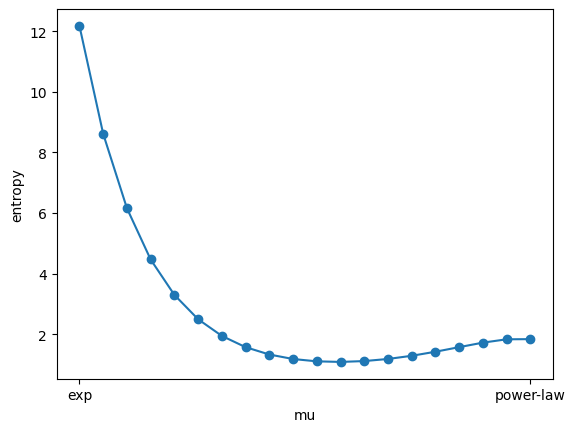

In [46]:
mu_list = np.linspace(0, 1, 20)

x_max = 10**6
params = [2.25, 1/1700, 0.5]
alpha = params[0]
beta = params[1]

x = np.arange(1,x_max+1)
s_results = []
for mu in mu_list:
    print(f'mu={mu}')
    y = np.array([(distr_plaw(i, alpha))**mu * (distr_exp(i, beta))**(1-mu) for i in x])
    #print(y)
    #s = np.array([entropy(i) for i in y])
    
    s_results.append(entropy(y))

plt.plot(mu_list, s_results, 'o-')
plt.ylabel('entropy')
plt.xlabel('mu')
my_xticks = ['exp', 'power-law']
plt.xticks([mu_list[0],mu_list[-1]], my_xticks)
plt.savefig('./pics_results/entropy_estimation_mu')

In [21]:
params = [2.25, 1/1700, 0.5]
alpha = params[0]
beta = params[1]
mu = params[2]
s_results = []
N_list = np.linspace(n_min//2,n_max, 3)
for N in N_list:
    print(f'N={N}')
    y = create_sample(int(N), params[0], params[1], params[2])
    #print(entropy(y))
    s_results.append(entropy(y))
plt.plot(N_list, s_results, 'o-')
plt.ylabel('entropy')
plt.xlabel('N')
#my_xticks = ['exp', 'power-law']
#plt.xticks([mu_list[0],mu_list[-1]], my_xticks)
plt.savefig('./pics_results/entropy_estimation_N')

N=109341.0


KeyboardInterrupt: 

In [34]:
y = create_sample(10000, params[0], params[1], params[2])
entropy(y)

12.829949488211831

In [33]:
params = [2.25, 1/1700, 0.5]
alpha = params[0]
beta = params[1]
mu = params[2]

1.4142135623730951